In [7]:
import pandas as pd

df = pd.read_csv('./data/도로공사 로드킬 (2019-2022).csv')
df.head()

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
0,수도권,경기광주,제2중부선,330~335,하남,330.0,4.0,37.283,127.386,2019
1,수도권,경기광주,중부선,325~330,통영,325.0,7.0,37.249,127.421,2019
2,수도권,경기광주,중부선,330~335,통영,330.0,10.0,37.283,127.385,2019
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315,127.347,2019
4,수도권,경기광주,중부선,340~345,통영,340.0,4.0,37.354,127.321,2019


In [8]:
jungbu = df[df['노선명'] == '중부선']
jungang = df[df['노선명'] == '중앙선']

## 중부선

In [9]:
jungbu

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
1,수도권,경기광주,중부선,325~330,통영,325.0,7.0,37.249000,127.421000,2019
2,수도권,경기광주,중부선,330~335,통영,330.0,10.0,37.283000,127.385000,2019
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315000,127.347000,2019
4,수도권,경기광주,중부선,340~345,통영,340.0,4.0,37.354000,127.321000,2019
5,수도권,경기광주,중부선,345~350,통영,345.0,6.0,37.398000,127.311000,2019
...,...,...,...,...,...,...,...,...,...,...
479,충북,진천,중부선,315~320,통영,315.0,3.0,37.163088,127.440035,2022
480,충북,진천,중부선,320~325,통영,320.0,3.0,37.207765,127.442214,2022
481,충북,진천,중부선,255~260,통영,255.0,3.0,36.666547,127.424086,2022
482,충북,진천,중부선,265~270,통영,265.0,3.0,36.745619,127.469129,2022


In [10]:
jungbu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 1 to 483
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   본부명     74 non-null     object 
 1   지사명     74 non-null     object 
 2   노선명     74 non-null     object 
 3   구간      74 non-null     object 
 4   방향      74 non-null     object 
 5   5km     74 non-null     float64
 6   발생건수    74 non-null     float64
 7   위도      74 non-null     float64
 8   경도      74 non-null     float64
 9   Year    74 non-null     int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 6.4+ KB


In [11]:
import folium

icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'

lat = jungbu['위도'].mean()
lon = jungbu['경도'].mean()
map_center = [lat, lon]
korea_map = folium.Map(location=map_center, zoom_start=8)

for _, row in jungbu.iterrows():
    icon = folium.CustomIcon(
        icon_url_red,
        icon_size=(10, 15)
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}",
        icon=icon
    ).add_to(korea_map)

korea_map

In [12]:
import folium
from folium.plugins import HeatMap

icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'

lat = jungbu['위도'].mean()
lon = jungbu['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in jungbu.iterrows()]

HeatMap(data=heat_data, radius=15, max_zoom=13).add_to(korea)

korea

- 본부명 기준: 충북 > 수도권 > 전북 > 부산경남
- 지사명 기준: 진천 > 경기광주 > 무주 > 고성
- 위경도: 경기광주 통영방향

In [13]:
import folium

lat = jungbu['위도'].mean()
lon = jungbu['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

for index, row in jungbu.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,
        weight=1,
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea


In [14]:
jungbu.groupby('본부명')['발생건수'].sum().sort_values(ascending=False)

본부명
충북      156.0
수도권     139.0
전북       33.0
부산경남      6.0
Name: 발생건수, dtype: float64

In [15]:
jungbu.groupby('지사명')['발생건수'].sum().sort_values(ascending=False)

지사명
진천      156.0
경기광주    139.0
무주       33.0
고성        6.0
Name: 발생건수, dtype: float64

In [16]:
jungbu.sort_values(by='발생건수', ascending=False).head(10)

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
206,수도권,경기광주,중부선,335~340,통영,335.0,15.0,37.314957,127.347204,2020
204,수도권,경기광주,중부선,330~335,통영,330.0,12.0,37.283193,127.384920,2020
2,수도권,경기광주,중부선,330~335,통영,330.0,10.0,37.283000,127.385000,2019
454,충북,진천,중부선,250~255,통영,250.0,9.0,36.622266,127.420248,2022
212,수도권,경기광주,중부선,340~345,통영,340.0,9.0,37.353642,127.320539,2020
225,전북,무주,중부선,185~190,통영,185.0,8.0,36.105478,127.517861,2020
1,수도권,경기광주,중부선,325~330,통영,325.0,7.0,37.249000,127.421000,2019
202,수도권,경기광주,중부선,325~330,통영,325.0,7.0,37.248957,127.421370,2020
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315000,127.347000,2019
455,충북,진천,중부선,290~295,통영,290.0,7.0,36.947610,127.471406,2022


In [17]:
jungbu.sort_values(by='발생건수', ascending=False).tail(10)

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
224,전북,무주,중부선,170~175,통영,170.0,3.0,35.994236,127.604336,2020
226,전북,무주,중부선,190~195,하남,190.0,3.0,36.146375,127.507369,2020
227,전북,무주,중부선,205~210,통영,205.0,3.0,36.268601,127.469419,2020
238,충북,진천,중부선,250~255,통영,250.0,3.0,36.622266,127.420248,2020
239,충북,진천,중부선,265~270,하남,265.0,3.0,36.745619,127.469129,2020
259,수도권,경기광주,중부선,330~335,통영,330.0,3.0,37.283193,127.384920,2021
260,수도권,경기광주,중부선,340~345,통영,340.0,3.0,37.353642,127.320539,2021
261,수도권,경기광주,중부선,325~330,하남,325.0,3.0,37.248957,127.421370,2021
262,수도권,경기광주,중부선,330~335,하남,330.0,3.0,37.283193,127.384920,2021
483,충북,진천,중부선,270~275,하남,270.0,3.0,36.778273,127.506681,2022


In [18]:
print("진천: ", jungbu[jungbu['지사명'] == '진천']['발생건수'].mean())
print("경기광주: ", jungbu[jungbu['지사명'] == '경기광주']['발생건수'].mean())
print("무주: ", jungbu[jungbu['지사명'] == '무주']['발생건수'].mean())
print("고성: ", jungbu[jungbu['지사명'] == '고성']['발생건수'].mean())

진천:  4.105263157894737
경기광주:  5.56
무주:  3.6666666666666665
고성:  3.0


### 연도별 데이터

In [19]:
jungbu_year = jungbu.groupby('Year')['발생건수'].sum().sort_values(ascending=False)
jungbu_year

Year
2020    121.0
2022     86.0
2019     65.0
2021     62.0
Name: 발생건수, dtype: float64

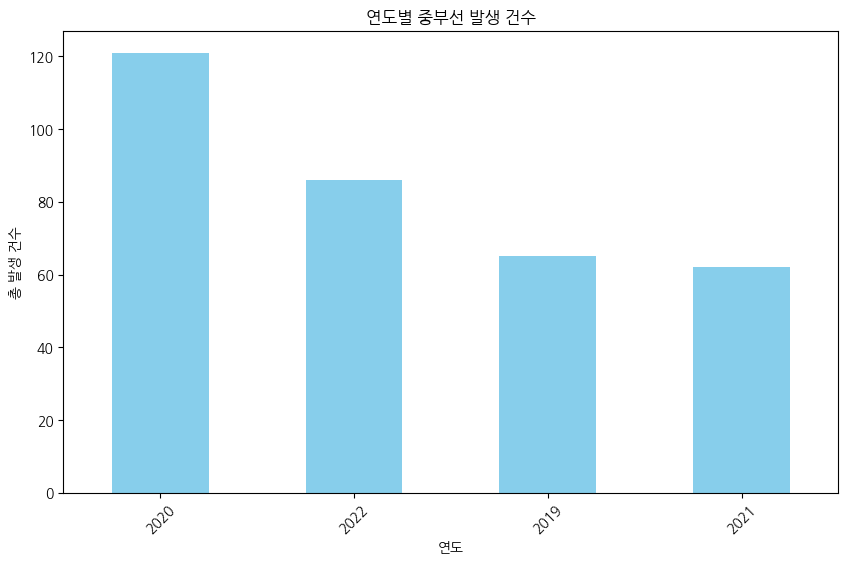

In [20]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(10, 6))
jungbu_year.plot(kind='bar', color='skyblue')

plt.title('연도별 중부선 발생 건수')
plt.xlabel('연도')
plt.ylabel('총 발생 건수')

plt.xticks(rotation=45)
plt.show()

In [21]:
jungbu_2019 = jungbu[jungbu['Year'] == 2019]

In [22]:
import folium

lat = jungbu_2019['위도'].mean()
lon = jungbu_2019['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for index, row in jungbu_2019.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,
        weight=1, 
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea


In [23]:
jungbu_2020 = jungbu[jungbu['Year'] == 2020]

In [24]:
import folium

lat = jungbu_2020['위도'].mean()
lon = jungbu_2020['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for index, row in jungbu_2020.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,
        weight=1,
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea


In [25]:
jungbu_2021 = jungbu[jungbu['Year'] == 2021]

In [26]:
import folium

lat = jungbu_2021['위도'].mean()
lon = jungbu_2021['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for index, row in jungbu_2021.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,
        weight=1,
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea

In [27]:
jungbu_2022 = jungbu[jungbu['Year'] == 2022]

In [28]:
import folium

lat = jungbu_2022['위도'].mean()
lon = jungbu_2022['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for index, row in jungbu_2022.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3, 
        weight=1, 
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

# 지도 표시
korea

In [29]:
import folium

# 지도 초기 위치와 확대 수준 설정
lat = jungbu['위도'].mean()
lon = jungbu['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

# 색상 설정
colors = {
    '2019': 'blue',
    '2020': 'green',
    '2021': 'purple',
    '2022': 'crimson'
}

# 데이터프레임 리스트와 해당 연도
datasets = {
    '2019': jungbu_2019,
    '2020': jungbu_2020,
    '2021': jungbu_2021,
    '2022': jungbu_2022
}

# 각 데이터프레임에 원 추가
for year, df in datasets.items():
    for index, row in df.iterrows():
        folium.Circle(
            location=[row['위도'], row['경도']],
            radius=row['발생건수'] * 500,  # 발생건수에 비례하여 원의 반지름 설정
            color=colors[year],
            fill=True,
            fill_color=colors[year],
            fill_opacity=0.4,
            opacity=0.3,  # 테두리의 투명도 설정
            weight=1,    # 테두리의 두께 설정
            popup=f"연도: {year}, 본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
        ).add_to(korea)

# 지도 표시
korea


### 진천 vs 경기광주

In [30]:
print("진천: ", jungbu[jungbu['지사명'] == '진천']['지사명'].count())
print("경기광주: ", jungbu[jungbu['지사명'] == '경기광주']['지사명'].count())
print("무주: ", jungbu[jungbu['지사명'] == '무주']['지사명'].count())
print("고성: ", jungbu[jungbu['지사명'] == '고성']['지사명'].count())

진천:  38
경기광주:  25
무주:  9
고성:  2


In [31]:
top10 = jungbu.nlargest(10, '발생건수')

lat = jungbu['위도'].mean()
lon = jungbu['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

for index, row in top10.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea

In [32]:
jungbu_gyeonggi = jungbu[jungbu['지사명'] == '경기광주']
jungbu_gyeonggi['경도'].max() - jungbu_gyeonggi['경도'].min()

0.19412119999999788

In [33]:
jungbu_jincheon = jungbu[jungbu['지사명'] == '진천']
jungbu_jincheon['경도'].max() - jungbu_jincheon['경도'].min()

0.0864327999999972

In [34]:
import folium
from folium.plugins import HeatMap

icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'

# 지도의 초기 위치와 확대 수준 설정
jungbu_gyeonggi = jungbu[jungbu['지사명'] == '경기광주']
lat = jungbu_gyeonggi['위도'].mean()
lon = jungbu_gyeonggi['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

# 히트맵 데이터 준비
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in jungbu_gyeonggi.iterrows()]

# 히트맵 생성
HeatMap(data=heat_data, radius=15, max_zoom=13).add_to(korea)

# 지도 표시
korea

In [35]:
import folium
from folium.plugins import HeatMap

icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'

# 지도의 초기 위치와 확대 수준 설정
jungbu_jincheon = jungbu[jungbu['지사명'] == '진천']
lat = jungbu_jincheon['위도'].mean()
lon = jungbu_jincheon['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

# 히트맵 데이터 준비
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in jungbu_jincheon.iterrows()]

# 히트맵 생성
HeatMap(data=heat_data, radius=15, max_zoom=13).add_to(korea)

# 지도 표시
korea

- 본부명: 충북 > 수도권 > 전북 > 부산경남
- 지사명: 진천 > 경기광주 > 무주 > 고성
- 상위 10: 경기광주 > 진천 > 무주
- 하위 10: 경기광주 > 진천 > 무주
- 로드킬이 많이 발생하는 지역은 진천과 경기광주이다. 
- 진천의 경우 한 장소에서 반복된 로드킬의 횟수는 적으나, 넓은 지역에서 로드킬이 발생하고 있다. 
- 경기광주의 경우 일정한 지역에서 로드킬이 반복적으로 발생하고 있다. 

- 각 데이터의 발생건수 기준으로 보았을 때 경기광주 지사의 발생건수가 많다. 
- 지사명을 기준으로 보았을 때 진천의 발생건수가 많다.
- -> 경기 광주는 적은 위치에서 많은 로드킬이 집중적으로 발생한다. 
- -> 진천은 여러 곳에서 높은 수의 발생건수가 발생한다. 
- -> 하지만 위경도가 다르지만 거의 비슷한 위치에 존재하는 로드킬 데이터들이 있다. 

1. 발생건수가 많은 데이터들 중에 한곳에 몰려서 위치하고 있는 로드킬 데이터가 있는지 확인하기
    -> 해당 지역의 전체 발생 건수 확인
    -> 실제로 경기 광주가 진천보다 로드킬 발생 빈도가 높은 지역이 있는지 확인
2. 생태통로가 위치하고 있는지 확인
3. 국립공원공단 로드킬 데이터를 활용하여 주변에 국립공원이 있다면 주로 서식하는 생물 확인
4. 중부선, 중앙선에서 로드킬이 발생하는 원인 분석 (교통량, 기사 등)

In [36]:
jungbu.head()

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
1,수도권,경기광주,중부선,325~330,통영,325.0,7.0,37.249,127.421,2019
2,수도권,경기광주,중부선,330~335,통영,330.0,10.0,37.283,127.385,2019
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315,127.347,2019
4,수도권,경기광주,중부선,340~345,통영,340.0,4.0,37.354,127.321,2019
5,수도권,경기광주,중부선,345~350,통영,345.0,6.0,37.398,127.311,2019


### 발생건수가 많은 지역 살펴보기

In [37]:
jungbu[jungbu['발생건수'] == jungbu['발생건수'].max()]

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
206,수도권,경기광주,중부선,335~340,통영,335.0,15.0,37.314957,127.347204,2020


In [38]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 지구의 반경 (km)
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [39]:
import pandas as pd

# 최대 발생건수의 위도와 경도
max_row = jungbu[jungbu['발생건수'] == jungbu['발생건수'].max()].iloc[0]
max_lat = max_row['위도']
max_lon = max_row['경도']

location = []

for idx, row in jungbu.iterrows():
    distance = haversine(max_lat, max_lon, row['위도'], row['경도'])
    if distance <= 3:
        location.append(row)

location1 = pd.DataFrame(location)
location1

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315000,127.347000,2019
206,수도권,경기광주,중부선,335~340,통영,335.0,15.0,37.314957,127.347204,2020
210,수도권,경기광주,중부선,335~340,하남,335.0,3.0,37.314957,127.347204,2020
433,수도권,경기광주,중부선,335~340,통영,335.0,4.0,37.314957,127.347204,2022


In [40]:
location1['발생건수'].sum()

29.0

In [41]:
jungbu.groupby(['위도', '경도']).agg({'발생건수': 'sum'}).sort_values(by='발생건수', ascending=False).head(10)

,,발생건수
위도,경도,
37.314957,127.347204,18.0
37.283193,127.384920,18.0
37.283000,127.385000,13.0
37.248957,127.421370,13.0
36.622266,127.420248,13.0
36.947610,127.471406,12.0
37.353642,127.320539,12.0
37.035401,127.480114,9.0
36.991334,127.474735,9.0


In [42]:
import pandas as pd

# 최대 발생건수의 위도와 경도
max_lat = 37.314957
max_lon = 127.347204

location = []

for idx, row in jungbu.iterrows():
    distance = haversine(max_lat, max_lon, row['위도'], row['경도'])
    if distance <= 1:
        location.append(row)

location2 = pd.DataFrame(location)
location2

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
3,수도권,경기광주,중부선,335~340,통영,335.0,7.0,37.315000,127.347000,2019
206,수도권,경기광주,중부선,335~340,통영,335.0,15.0,37.314957,127.347204,2020
210,수도권,경기광주,중부선,335~340,하남,335.0,3.0,37.314957,127.347204,2020
433,수도권,경기광주,중부선,335~340,통영,335.0,4.0,37.314957,127.347204,2022


In [43]:
location2['발생건수'].sum()

29.0

### 생태통로

In [44]:
import pandas as pd

df2 = pd.read_csv('./data/전국생태통로.csv')
df2.drop(columns='번호', inplace=True)
df2.head()

,주소,차선_수,관리기관,생태통로유형,설치기관,설치년도,위도,경도
0,서울특별시 구로구 궁동,6,서울특별시 구로구,육교형,서울특별시,2001,37.506492,126.830989
1,부산광역시 금정구 회동동 산4-1,2,부산광역시 금정구,육교형,부산광역시,2009,35.251681,129.140919
2,부산광역시 기장군 철마면 웅천리,2,부산광역시 기장군,육교형,부산광역시,2007,35.305778,129.172000
3,부산광역시 기장군 정관면 예림리,4,부산광역시 기장군,터널형,부산광역시,2007,35.329667,129.203306
4,부산광역시 사하구 하단동,7,부산광역시 낙동강관리본부,육교형,부산광역시 낙동강관리본부,2012,35.108846,128.941241


In [45]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 지구의 반경 (km)
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [97]:
near_jungbu = []

for idx, row in jungbu.iterrows():
    for idx1, row1 in df2.iterrows():
        distance = haversine(row1['위도'], row1['경도'], row['위도'], row['경도'])
        if distance < 5:
            near_jungbu.append(row1)

near_jungbu = pd.DataFrame(near_jungbu)
near_jungbu.head()

,주소,차선_수,관리기관,생태통로유형,설치기관,설치년도,위도,경도
397,충청남도 예산군 신양면 대덕리 370-1,4,충청남도 종합건설사업소 홍성지소,육교형,대전지방국토관리청,2005,37.288889,127.410833
397,충청남도 예산군 신양면 대덕리 370-1,4,충청남도 종합건설사업소 홍성지소,육교형,대전지방국토관리청,2005,37.288889,127.410833
397,충청남도 예산군 신양면 대덕리 370-1,4,충청남도 종합건설사업소 홍성지소,육교형,대전지방국토관리청,2005,37.288889,127.410833
79,충청북도 청주시 청원구 오창읍 구룡리,4,충청북도 청주시,육교형,충청북도,2001,36.717222,127.417778
80,충청북도 청주시 청원구 오창읍 양청리,4,충청북도 청주시,육교형,충청북도,2001,36.712222,127.425278


In [98]:
near_jungbu.count()

주소        57
차선_수      57
관리기관      57
생태통로유형    57
설치기관      57
설치년도      57
위도        57
경도        57
dtype: int64

In [100]:
import folium

icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'
icon_url_blue = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-blue.png'

lat = jungbu['위도'].mean()
lon = jungbu['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

for _, row in jungbu.iterrows():
    icon = folium.CustomIcon(
        icon_url_red,
        icon_size=(18, 25)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}",
        icon=icon
    ).add_to(korea)

for _, row in near_jungbu.iterrows():
    icon = folium.CustomIcon(
        icon_url_blue,
        icon_size=(18, 25)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"위도:  {row['위도']}, 경도:  {row['경도']}, 설치년도: {row['설치년도']}",
        icon=icon
    ).add_to(korea)

korea

In [49]:
import pandas as pd

# 최대 발생건수의 위도와 경도
max_lat = 37.314957
max_lon = 127.347204

location = []

for idx, row in df2.iterrows():
    distance = haversine(max_lat, max_lon, row['위도'], row['경도'])
    if distance <= 5:
        location.append(row)

location3 = pd.DataFrame(location)
location3

""


In [50]:
import folium

icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'
icon_url_blue = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-blue.png'

lat = jungbu['위도'].mean()
lon = jungbu['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

for _, row in jungbu.iterrows():
    icon = folium.CustomIcon(
        icon_url_red,
        icon_size=(10, 15)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}",
        icon=icon
    ).add_to(korea)

for _, row in df2.iterrows():
    icon = folium.CustomIcon(
        icon_url_blue,
        icon_size=(10, 15)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"위도:  {row['위도']}, 경도:  {row['경도']}, 설치년도: {row['설치년도']}",
        icon=icon
    ).add_to(korea)

korea

### 국립공원 데이터

In [51]:
import pandas as pd
df3 = pd.read_csv('./data/국립공원공단_국립공원 로드킬 정보_20231220.csv', encoding='cp949')
df3.head()

,국립공원명,조사일자,자원명,경도,위도
0,한려해상,2021-10-20,멧새,128.674692,34.752264
1,한려해상,2021-10-13,청설모,128.674692,34.752264
2,한려해상,2021-10-11,청설모,128.674692,34.752264
3,한려해상,2021-09-02,능구렁이,128.674692,34.752264
4,한려해상,2021-07-27,고라니,128.674692,34.752264


In [52]:
import pandas as pd

# 최대 발생건수의 위도와 경도
max_lat = 37.314957
max_lon = 127.347204

location = []

for idx, row in df3.iterrows():
    distance = haversine(max_lat, max_lon, row['위도'], row['경도'])
    if distance <= 5:
        location.append(row)

location4 = pd.DataFrame(location)
location4

""


## 중앙선

In [53]:
jungang

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
26,강원,홍천,중앙선,315~320,부산,315.0,7.0,37.341000,127.913000,2019
27,강원,홍천,중앙선,320~325,부산,320.0,3.0,37.383000,127.894000,2019
28,강원,홍천,중앙선,345~350,부산,345.0,3.0,37.573000,127.973000,2019
29,강원,홍천,중앙선,360~365,부산,360.0,6.0,37.670000,127.874000,2019
30,강원,홍천,중앙선,370~375,부산,370.0,9.0,37.725000,127.797000,2019
...,...,...,...,...,...,...,...,...,...,...
463,충북,제천,중앙선,295~300,부산,295.0,4.0,37.232508,128.080709,2022
464,충북,제천,중앙선,295~300,춘천,295.0,4.0,37.232508,128.080709,2022
465,충북,제천,중앙선,265~270,춘천,265.0,4.0,37.037343,128.258328,2022
477,충북,제천,중앙선,280~285,춘천,280.0,3.0,37.121223,128.149599,2022


In [54]:
import folium

# 작은 아이콘 이미지 경로
icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'

# 지도의 초기 위치와 확대 수준 설정
lat = jungang['위도'].mean()
lon = jungang['경도'].mean()
map_center = [lat, lon]
korea_map = folium.Map(location=map_center, zoom_start=9)

# df1의 국립공원 위치에 빨간색 마커 추가
for _, row in jungang.iterrows():
    icon = folium.CustomIcon(
        icon_url_red,
        icon_size=(10, 15)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}",
        icon=icon
    ).add_to(korea_map)

# 지도 표시
korea_map

In [55]:
jungang.groupby('본부명')['발생건수'].sum().sort_values(ascending=False)

본부명
강원      210.0
충북      138.0
대구경북     24.0
Name: 발생건수, dtype: float64

In [56]:
jungang.groupby('지사명')['발생건수'].sum().sort_values(ascending=False)

지사명
홍천    210.0
제천    138.0
영주     24.0
Name: 발생건수, dtype: float64

In [57]:
jungang.sort_values(by='발생건수', ascending=False)

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
365,강원,홍천,중앙선,315~320,부산,315.0,13.0,37.340987,127.912591,2022
135,강원,홍천,중앙선,315~320,부산,315.0,12.0,37.340987,127.912591,2020
248,충북,제천,중앙선,275~280,부산,275.0,11.0,37.083781,128.169862,2020
136,강원,홍천,중앙선,315~320,춘천,315.0,9.0,37.340987,127.912591,2020
141,강원,홍천,중앙선,360~365,부산,360.0,9.0,37.670184,127.874382,2020
...,...,...,...,...,...,...,...,...,...,...
276,강원,홍천,중앙선,355~360,부산,355.0,3.0,37.646758,127.919394,2021
277,강원,홍천,중앙선,360~365,부산,360.0,3.0,37.670184,127.874382,2021
278,강원,홍천,중앙선,375~380,부산,375.0,3.0,37.766429,127.790997,2021
279,강원,홍천,중앙선,385~390,부산,385.0,3.0,37.838769,127.777996,2021


In [58]:
import folium
from folium.plugins import HeatMap

# 지도의 초기 위치와 확대 수준 설정
lat = jungang['위도'].mean()
lon = jungang['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

# 히트맵 데이터 준비
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in jungang.iterrows()]

# 히트맵 생성
HeatMap(data=heat_data, radius=15, max_zoom=13).add_to(korea)

# 지도 표시
korea

In [59]:
import folium

# 지도의 초기 위치와 확대 수준 설정
lat = jungang['위도'].mean()
lon = jungang['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

# 각 위치에 발생건수에 따라 원 추가
for index, row in jungang.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,  # 발생건수에 비례하여 원의 반지름 설정
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,  # 테두리의 투명도 설정
        weight=1,    # 테두리의 두께 설정
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

# 지도 표시
korea

In [60]:
jungang.sort_values(by='발생건수', ascending=False)

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
365,강원,홍천,중앙선,315~320,부산,315.0,13.0,37.340987,127.912591,2022
135,강원,홍천,중앙선,315~320,부산,315.0,12.0,37.340987,127.912591,2020
248,충북,제천,중앙선,275~280,부산,275.0,11.0,37.083781,128.169862,2020
136,강원,홍천,중앙선,315~320,춘천,315.0,9.0,37.340987,127.912591,2020
141,강원,홍천,중앙선,360~365,부산,360.0,9.0,37.670184,127.874382,2020
...,...,...,...,...,...,...,...,...,...,...
276,강원,홍천,중앙선,355~360,부산,355.0,3.0,37.646758,127.919394,2021
277,강원,홍천,중앙선,360~365,부산,360.0,3.0,37.670184,127.874382,2021
278,강원,홍천,중앙선,375~380,부산,375.0,3.0,37.766429,127.790997,2021
279,강원,홍천,중앙선,385~390,부산,385.0,3.0,37.838769,127.777996,2021


### 연도별 데이터

In [61]:
jungang_year = jungang.groupby('Year')['발생건수'].sum().sort_values(ascending=False)
jungang_year

Year
2020    123.0
2019    105.0
2022     76.0
2021     68.0
Name: 발생건수, dtype: float64

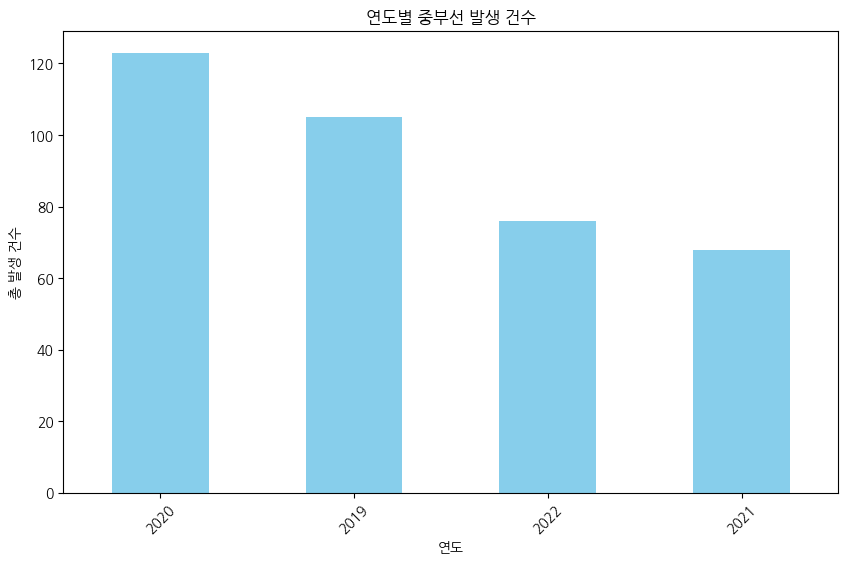

In [62]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(10, 6))
jungang_year.plot(kind='bar', color='skyblue')

plt.title('연도별 중부선 발생 건수')
plt.xlabel('연도')
plt.ylabel('총 발생 건수')

plt.xticks(rotation=45)
plt.show()

In [63]:
jungang_2019 = jungang[jungang['Year'] == 2019]

In [64]:
import folium

lat = jungang_2019['위도'].mean()
lon = jungang_2019['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for index, row in jungang_2019.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,
        weight=1, 
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea

In [65]:
jungang_2020 = jungang[jungang['Year'] == 2020]

In [66]:
import folium

lat = jungang_2020['위도'].mean()
lon = jungang_2020['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for index, row in jungang_2020.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,
        weight=1, 
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea

In [67]:
jungang_2021 = jungang[jungang['Year'] == 2021]

In [68]:
import folium

lat = jungang_2021['위도'].mean()
lon = jungang_2021['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for index, row in jungang_2021.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,
        weight=1, 
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea

In [69]:
jungang_2022 = jungang[jungang['Year'] == 2022]

In [70]:
import folium

lat = jungang_2022['위도'].mean()
lon = jungang_2022['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for index, row in jungang_2022.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 500,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.4,
        opacity=0.3,
        weight=1, 
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

korea

### 생태통로

In [101]:
near_jungang = []

for idx, row in jungang.iterrows():
    for idx1, row1 in df2.iterrows():
        distance = haversine(row1['위도'], row1['경도'], row['위도'], row['경도'])
        if distance < 5:
            near_jungang.append(row1)

near_jungang = pd.DataFrame(near_jungang)
near_jungang.head()

,주소,차선_수,관리기관,생태통로유형,설치기관,설치년도,위도,경도
345,강원도 횡성군 횡성읍 갈풍리,4,한국도로공사,터널형,한국도로공사,2001,37.487997,127.949789
345,강원도 횡성군 횡성읍 갈풍리,4,한국도로공사,터널형,한국도로공사,2001,37.487997,127.949789
467,강원도 춘천시 동내면 학곡리 산68-2번지 일대,2,홍천국토관리사무소,터널형,홍천국토관리사무소,1986,37.816639,127.758289
468,강원도 춘천시 동내면 거두리 산88-14번지 일대,2,홍천국토관리사무소,육교형,홍천국토관리사무소,2016,37.869753,127.776794
467,강원도 춘천시 동내면 학곡리 산68-2번지 일대,2,홍천국토관리사무소,터널형,홍천국토관리사무소,1986,37.816639,127.758289


In [102]:
import folium

icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'
icon_url_blue = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-blue.png'

lat = jungang['위도'].mean()
lon = jungang['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=9)

for _, row in jungang.iterrows():
    icon = folium.CustomIcon(
        icon_url_red,
        icon_size=(20, 30)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}",
        icon=icon
    ).add_to(korea)

for _, row in near_jungang.iterrows():
    icon = folium.CustomIcon(
        icon_url_blue,
        icon_size=(20, 30)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"위도:  {row['위도']}, 경도:  {row['경도']}, 설치년도: {row['설치년도']}",
        icon=icon
    ).add_to(korea)

korea

In [73]:
near_jungang.count()

주소        63
차선_수      63
관리기관      63
생태통로유형    63
설치기관      63
설치년도      63
위도        63
경도        63
dtype: int64

In [90]:
import folium

# 작은 아이콘 이미지 경로
icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'
icon_url_blue = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-blue.png'

# 지도의 초기 위치와 확대 수준 설정
lat = jungang['위도'].mean()
lon = jungang['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

# df1의 국립공원 위치에 빨간색 마커 추가
for _, row in jungang.iterrows():
    icon = folium.CustomIcon(
        icon_url_red,
        icon_size=(20, 30)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}",
        icon=icon
    ).add_to(korea)

for _, row in df2.iterrows():
    icon = folium.CustomIcon(
        icon_url_blue,
        icon_size=(20, 30)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"생태통로유형: {row['생태통로유형']}",
        icon=icon
    ).add_to(korea)

# 지도 표시
korea

### 로드킬 발생건수 많은 지역

In [75]:
jungang.groupby(['위도', '경도']).agg({'발생건수': 'sum'}).sort_values(by='발생건수', ascending=False).head(10)

발생건수
위도        경도              
37.340987 127.912591  21.0
          127.912591  20.0
37.233000 128.081000  18.0
37.670184 127.874382  15.0
37.341000 127.913000  15.0
37.083781 128.169862  14.0
37.340987 127.912591  14.0
37.202046 128.118211   9.0
37.725000 127.797000   9.0
37.202000 128.118000   9.0

In [76]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 지구의 반경 (km)
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [77]:
import pandas as pd

# 최대 발생건수의 위도와 경도
max_lat = 37.340987
max_lon = 127.912591

location = []

for idx, row in jungang.iterrows():
    distance = haversine(max_lat, max_lon, row['위도'], row['경도'])
    if distance <= 1:
        location.append(row)

location5 = pd.DataFrame(location)
location5

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
26,강원,홍천,중앙선,315~320,부산,315.0,7.0,37.341000,127.913000,2019
32,강원,홍천,중앙선,315~320,춘천,315.0,8.0,37.341000,127.913000,2019
135,강원,홍천,중앙선,315~320,부산,315.0,12.0,37.340987,127.912591,2020
136,강원,홍천,중앙선,315~320,춘천,315.0,9.0,37.340987,127.912591,2020
273,강원,홍천,중앙선,315~320,부산,315.0,8.0,37.340987,127.912591,2021
280,강원,홍천,중앙선,315~320,춘천,315.0,6.0,37.340987,127.912591,2021
365,강원,홍천,중앙선,315~320,부산,315.0,13.0,37.340987,127.912591,2022
366,강원,홍천,중앙선,315~320,춘천,315.0,7.0,37.340987,127.912591,2022


In [78]:
jungang[jungang['구간'] == '315~320']

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도,Year
26,강원,홍천,중앙선,315~320,부산,315.0,7.0,37.341000,127.913000,2019
32,강원,홍천,중앙선,315~320,춘천,315.0,8.0,37.341000,127.913000,2019
135,강원,홍천,중앙선,315~320,부산,315.0,12.0,37.340987,127.912591,2020
136,강원,홍천,중앙선,315~320,춘천,315.0,9.0,37.340987,127.912591,2020
273,강원,홍천,중앙선,315~320,부산,315.0,8.0,37.340987,127.912591,2021
280,강원,홍천,중앙선,315~320,춘천,315.0,6.0,37.340987,127.912591,2021
365,강원,홍천,중앙선,315~320,부산,315.0,13.0,37.340987,127.912591,2022
366,강원,홍천,중앙선,315~320,춘천,315.0,7.0,37.340987,127.912591,2022


In [79]:
import folium

lat = location5['위도'].mean()
lon = location5['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=20)

for index, row in location5.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"위도: {row['위도']}, 경도: {row['경도']}"
    ).add_to(korea)

korea

In [80]:
import folium

# 지도의 초기 위치와 확대 수준 설정
lat = location5['위도'].mean()
lon = location5['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=15)

# 각 위치에 발생건수에 따라 원 추가
for index, row in location5.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=row['발생건수'] * 100,  # 발생건수에 비례하여 원의 반지름 설정
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.2,
        opacity=0.2,  # 테두리의 투명도 설정
        weight=1,    # 테두리의 두께 설정
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}"
    ).add_to(korea)

# 지도 표시
korea

In [81]:
import pandas as pd

df2 = pd.read_csv('./data/전국생태통로.csv')
df2.drop(columns='번호', inplace=True)
df2.head()

,주소,차선_수,관리기관,생태통로유형,설치기관,설치년도,위도,경도
0,서울특별시 구로구 궁동,6,서울특별시 구로구,육교형,서울특별시,2001,37.506492,126.830989
1,부산광역시 금정구 회동동 산4-1,2,부산광역시 금정구,육교형,부산광역시,2009,35.251681,129.140919
2,부산광역시 기장군 철마면 웅천리,2,부산광역시 기장군,육교형,부산광역시,2007,35.305778,129.172000
3,부산광역시 기장군 정관면 예림리,4,부산광역시 기장군,터널형,부산광역시,2007,35.329667,129.203306
4,부산광역시 사하구 하단동,7,부산광역시 낙동강관리본부,육교형,부산광역시 낙동강관리본부,2012,35.108846,128.941241


In [82]:
import pandas as pd

# 최대 발생건수의 위도와 경도
max_lat = 37.340987
max_lon = 127.912591

location = []

for idx, row in df2.iterrows():
    distance = haversine(max_lat, max_lon, row['위도'], row['경도'])
    if distance <= 10:
        location.append(row)

location6 = pd.DataFrame(location)
location6

""


In [83]:
max_lat = 37.340987
max_lon = 127.912591

location = []

for idx, row in df3.iterrows():
    distance = haversine(max_lat, max_lon, row['위도'], row['경도'])
    if distance <= 10:
        location.append(row)

location7 = pd.DataFrame(location)
location7

""


In [84]:
import pandas as pd

# 최대 발생건수의 위도와 경도
max_lat = 37.340987
max_lon = 127.912591

location = []

for idx, row in df2.iterrows():
    distance = haversine(max_lat, max_lon, row['위도'], row['경도'])
    if distance <= 1:
        location.append(row)

location5 = pd.DataFrame(location)
location5

""


In [85]:
import folium

icon_url_red = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-red.png'
icon_url_blue = 'https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-2x-blue.png'

lat = jungbu['위도'].mean()
lon = jungbu['경도'].mean()
map_center = [lat, lon]
korea = folium.Map(location=map_center, zoom_start=8)

for _, row in .iterrows():
    icon = folium.CustomIcon(
        icon_url_red,
        icon_size=(10, 15)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"본부명: {row['본부명']}, 발생건수: {row['발생건수']}",
        icon=icon
    ).add_to(korea)

for _, row in location5.iterrows():
    icon = folium.CustomIcon(
        icon_url_blue,
        icon_size=(10, 15)  # 아이콘의 크기 설정
    )
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"위도:  {row['위도']}, 경도:  {row['경도']}, 설치년도: {row['설치년도']}",
        icon=icon
    ).add_to(korea)

korea

SyntaxError: invalid syntax (1107598010.py, line 11)